# DA5401: A2 — PCA, Visualization & Logistic Regression (Mushroom Dataset)

**Author:** BASAVARAJ A NADUVINAMANI  

**Course:** DA5401  

**Notebook Last Edited:** 2025-09-05 10:04

---

## Executive Summary 
- The mushroom dataset is high-dimensional after one-hot encoding, with significant redundancy.
- PCA compresses features while preserving most variance.
- Logistic Regression on PCA-reduced data performs **comparable** to the full feature space, confirming PCA's usefulness for redundancy and efficiency.
- We evaluate using accuracy, precision, recall, F1, and confusion matrices.

---



## Assignment02: Dimensionality Reduction, Visualization, and Classification Performance 

Dataset : Mushroom Dataset that can be used for classification between edible or poisonous

In [53]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Viraj\.cache\kagglehub\datasets\uciml\mushroom-classification\versions\1


In [54]:
import pandas as pd
pd.read_csv(path + "/mushrooms.csv").head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [55]:
df = pd.read_csv(path + "/mushrooms.csv")
df.shape

(8124, 23)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

The dataset contains 8124 rows and 23 columns, with no missing values. All columns are of type object, meaning they are categorical features. Since the data is complete and entirely categorical, we can now proceed to explore it through visualizations.

In [57]:
# --- Mapping dictionaries for each column ---
mappings = {
    "class": {"e": "Edible", "p": "Poisonous"},
    "cap-shape": {"b":"Bell","c":"Conical","x":"Convex","f":"Flat","k":"Knobbed","s":"Sunken"},
    "cap-surface": {"f":"Fibrous","g":"Grooves","y":"Scaly","s":"Smooth"},
    "cap-color": {"n":"Brown","b":"Buff","c":"Cinnamon","g":"Gray","r":"Green","p":"Pink",
                  "u":"Purple","e":"Red","w":"White","y":"Yellow"},
    "bruises": {"t":"Yes","f":"No"},
    "odor": {"a":"Almond","l":"Anise","c":"Creosote","y":"Fishy","f":"Foul",
             "m":"Musty","n":"None","p":"Pungent","s":"Spicy"},
    "gill-attachment": {"a":"Attached","d":"Descending","f":"Free","n":"Notched"},
    "gill-spacing": {"c":"Close","w":"Crowded","d":"Distant"},
    "gill-size": {"b":"Broad","n":"Narrow"},
    "gill-color": {"k":"Black","n":"Brown","b":"Buff","h":"Chocolate","g":"Gray","r":"Green",
                   "o":"Orange","p":"Pink","u":"Purple","e":"Red","w":"White","y":"Yellow"},
    "stalk-shape": {"e":"Enlarging","t":"Tapering"},
    "stalk-root": {"b":"Bulbous","c":"Club","u":"Cup","e":"Equal","z":"Rhizo","r":"Rooted","?":"Missing"},
    "stalk-surface-above-ring": {"f":"Fibrous","y":"Scaly","k":"Silky","s":"Smooth"},
    "stalk-surface-below-ring": {"f":"Fibrous","y":"Scaly","k":"Silky","s":"Smooth"},
    "stalk-color-above-ring": {"n":"Brown","b":"Buff","c":"Cinnamon","g":"Gray","o":"Orange",
                               "p":"Pink","e":"Red","w":"White","y":"Yellow"},
    "stalk-color-below-ring": {"n":"Brown","b":"Buff","c":"Cinnamon","g":"Gray","o":"Orange",
                               "p":"Pink","e":"Red","w":"White","y":"Yellow"},
    "veil-type": {"p":"Partial","u":"Universal"},
    "veil-color": {"n":"Brown","o":"Orange","w":"White","y":"Yellow"},
    "ring-number": {"n":"None","o":"One","t":"Two"},
    "ring-type": {"c":"Cobwebby","e":"Evanescent","f":"Flaring","l":"Large","n":"None",
                  "p":"Pendant","s":"Sheathing","z":"Zone"},
    "spore-print-color": {"k":"Black","n":"Brown","b":"Buff","h":"Chocolate","r":"Green",
                          "o":"Orange","u":"Purple","w":"White","y":"Yellow"},
    "population": {"a":"Abundant","c":"Clustered","n":"Numerous","s":"Scattered","v":"Several","y":"Solitary"},
    "habitat": {"g":"Grasses","l":"Leaves","m":"Meadows","p":"Paths","u":"Urban","w":"Waste","d":"Woods"}
}

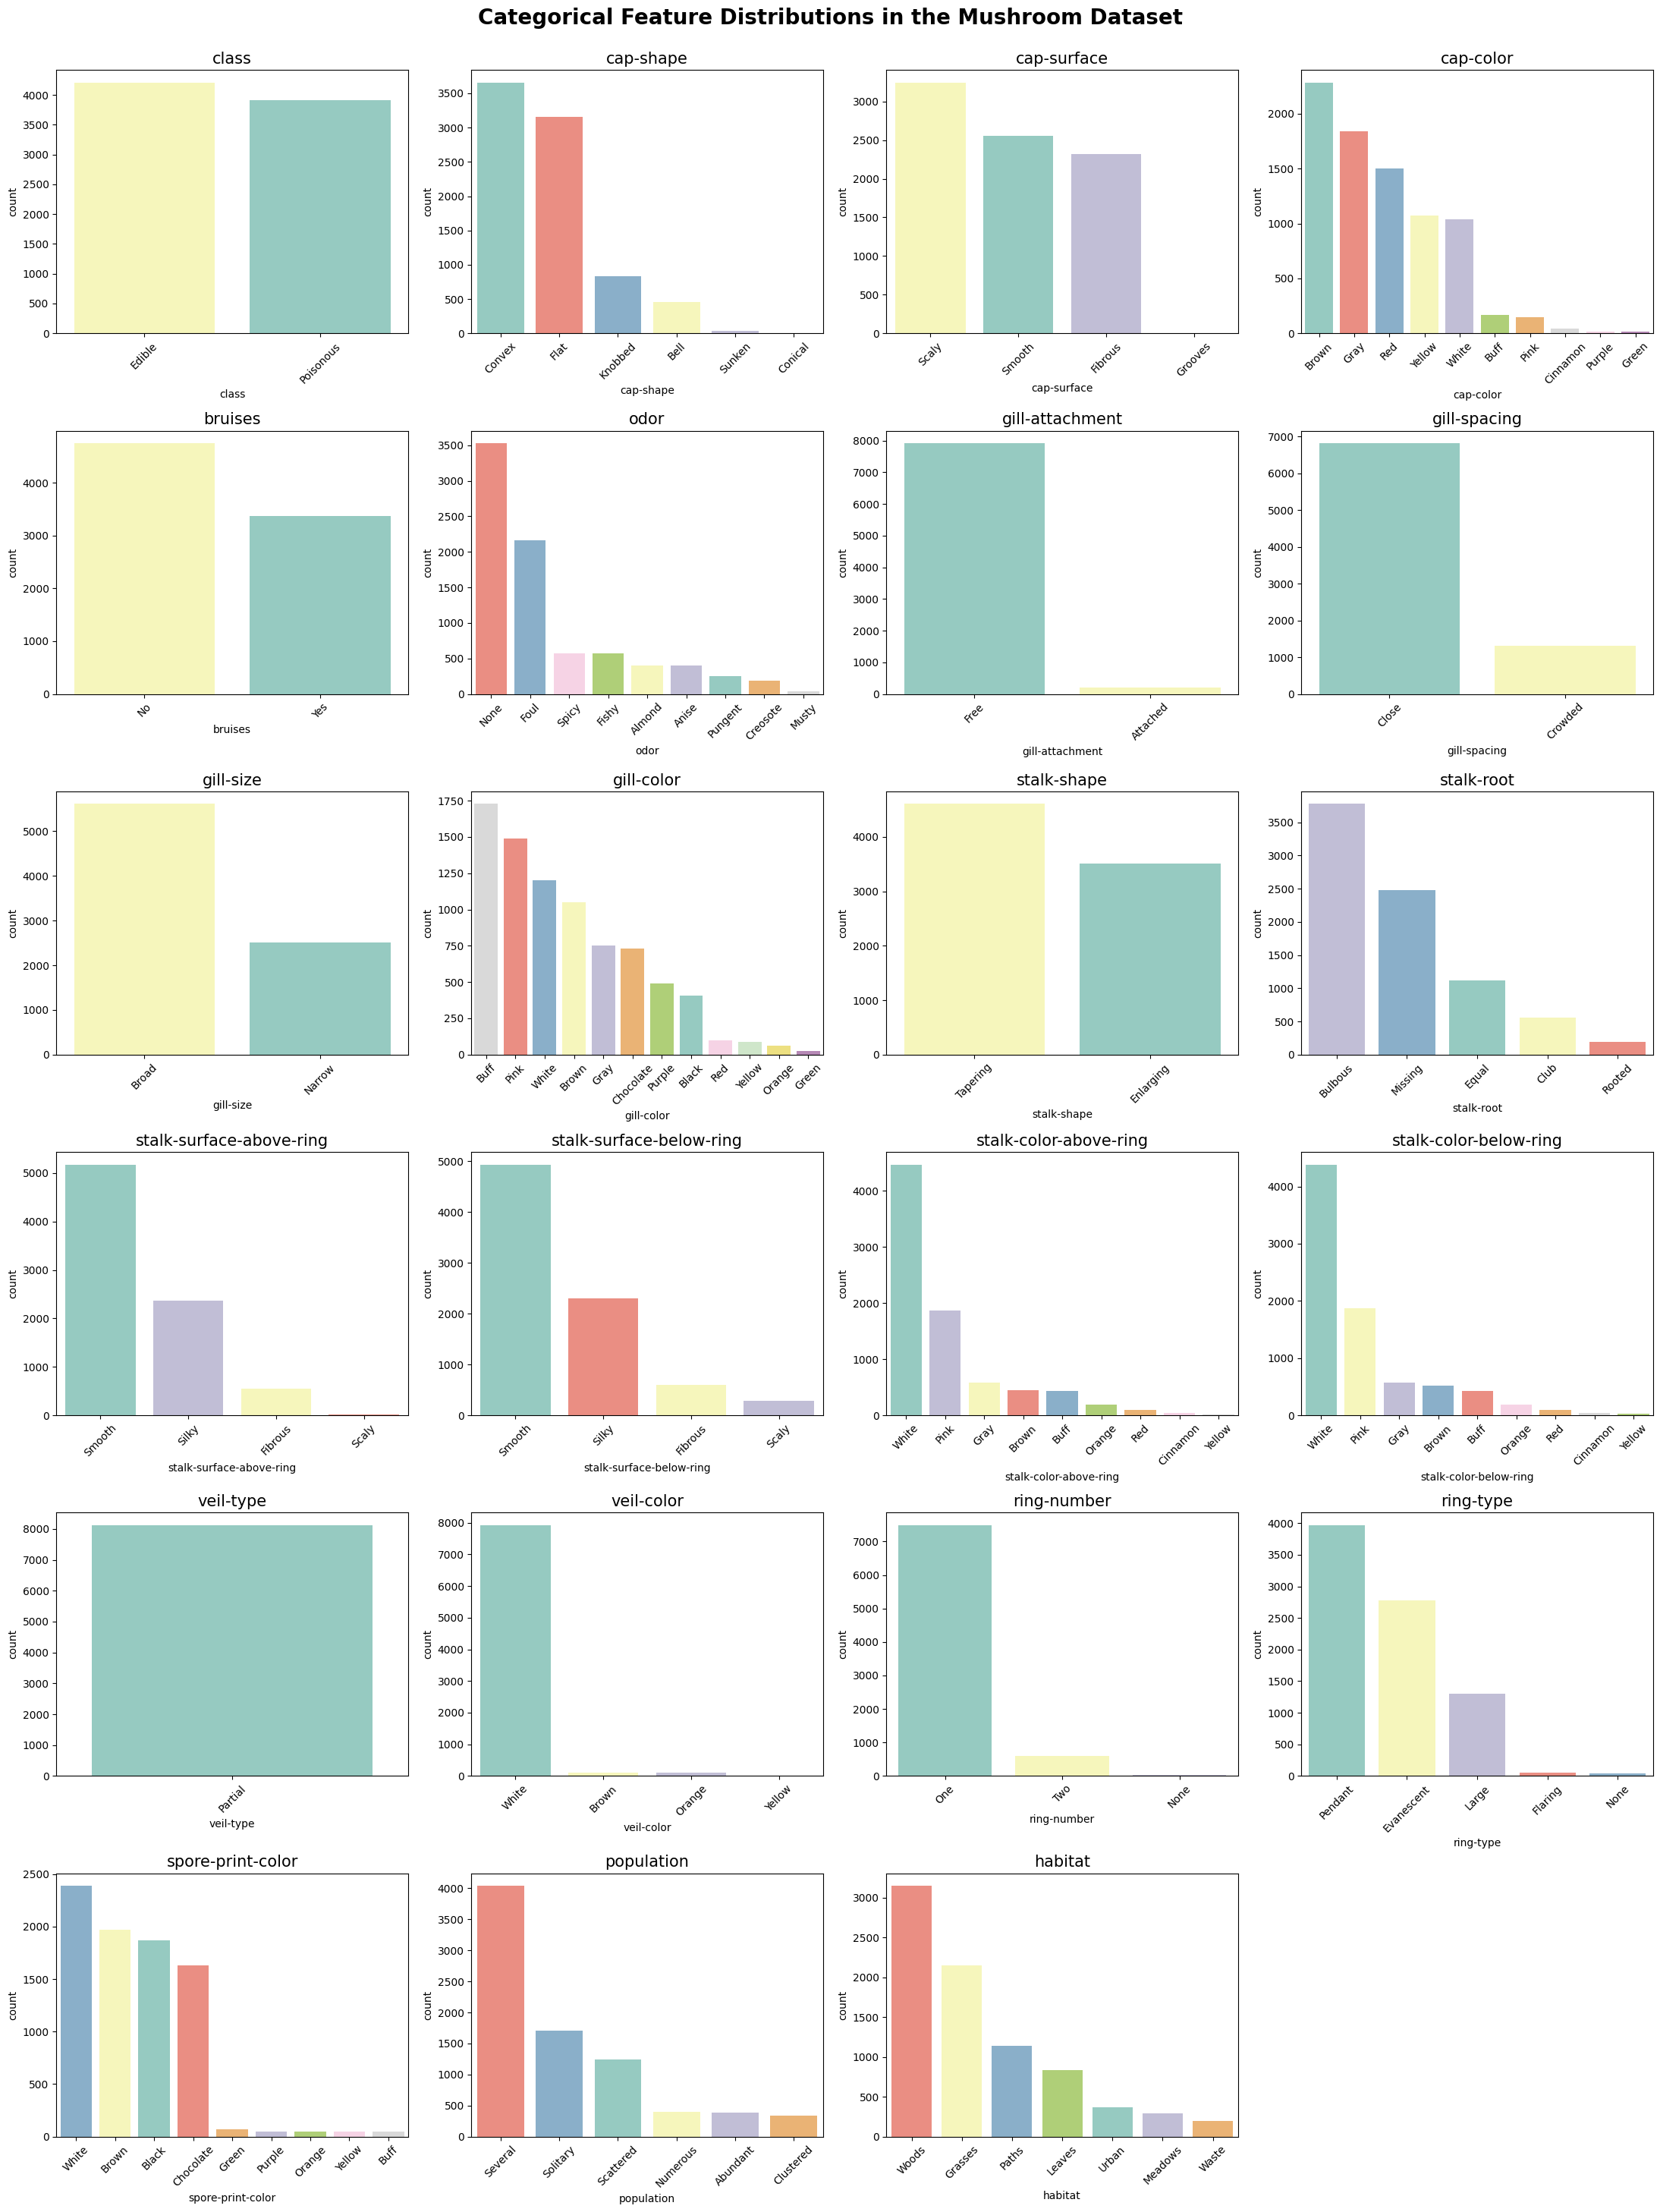

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns



# Apply the mappings to the dataframe
df_mapped = df.copy()
for col, mapping in mappings.items():
    df_mapped[col] = df_mapped[col].map(mapping)

# --- Visualization ---
cols = df_mapped.columns[:]   # all 23 columns
n_cols = 4
n_rows = int(len(cols) / n_cols) + 1

plt.figure(figsize=(22, 30))

plt.suptitle("Categorical Feature Distributions in the Mushroom Dataset", 
             fontsize=20, fontweight="bold", y=.97)

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_mapped, x=col, hue=col, palette="Set3",
                  order=df_mapped[col].value_counts().index, legend=False)
    plt.title(col, fontsize=15)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


| **Insight**            | **Evidence from the Plots**                                                                 | **Implication for Modeling**                                                                 |
|--------------------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| **Balanced Target**      | The `class` variable shows two bars of similar height (~4,000 each).                        | Accuracy is a fair evaluation metric; no class re-balancing is required.                     |
| **Weak Predictors**      | Features like `veil-type` and `gill-attachment` are dominated by a single category.         | These low-information features add little signal and can likely be dropped safely.            |
| **Missing Data**         | `stalk-root` has noticeably fewer total observations compared to other features.            | Needs preprocessing (e.g., imputation or removal) before modeling.                           |
| **Strong Predictors**    | Features like `odor`, `population`, and `ring-number` show multiple well-separated groups.  | These variables are highly informative and should be prioritized in the model.               |
| **Visualization Design** | Subplots use consistent scaling and grouping, making category dominance easy to spot.       | Enhances interpretability, helping analysts quickly identify redundant or predictive features.|


In [59]:
# Separate target
y = df['class']  # target variable

# Apply one-hot encoding to all other categorical features
X = pd.get_dummies(df.drop('class', axis=1)).astype(int)

# Separate target
y = df['class'].map({'e': 0, 'p': 1})



In [60]:
X.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Why One-Hot Encoding Before PCA?

- **PCA Input Requirement** → PCA needs purely **numeric features** to compute variance–covariance matrices.  
- **Categorical Problem** → Mushroom features (e.g., `cap-color`) are nominal, not ordinal.  
- **Incorrect Encoding Risk** → If encoded as integers (`brown=1, red=2, yellow=3`), PCA would wrongly assume **magnitude + order** among categories.  
- **Solution** → One-hot encoding creates binary indicators:  
  - `cap-color_brown`, `cap-color_red`, `cap-color_yellow`  
  - Values = {0,1}, ensuring no artificial ordering.  
- **Dimensionality Effect** → Original 22 categorical features → expands to ~117 binary features after encoding.  
- **Modeling Benefit** → All categories contribute equally; PCA then extracts **true variance structure** without bias from arbitrary codes.  


In [61]:
#After one hot encoding checking the shape of X and y
print(X.shape)
print(y.shape)


(8124, 117)
(8124,)


### Impact of One-Hot Encoding on Dimensionality

- **Feature Explosion** → 22 original categorical attributes → ~117 binary columns after one-hot encoding.  
- **Reason** → Each category level becomes its own feature (e.g., `odor_almond`, `odor_foul`, `odor_none`, …).  
- **Curse of Dimensionality** → More features = higher redundancy, increased sparsity, slower models.  
- **Motivation for PCA** → Compress high-dimensional space into a smaller set of **orthogonal components** while retaining most variance.  
- **Efficiency Gain** → PCA reduces noise + redundancy, leading to **simpler models** and faster training without large accuracy loss.  


### Why Standardize One-Hot Encoded Features Before PCA?

- **Variance Bias in PCA** → PCA favors features with larger variance, since it maximizes variance directions.  
- **Binary Columns Issue** → One-hot features are {0,1}, but:  
  - Frequent categories → higher variance (closer to 0.25).  
  - Rare categories → very low variance (close to 0).  
- **Risk** → Without scaling, frequent categories dominate PCs; rare but important features get underweighted.  
- **Standardization Fix** → Each feature is centered (mean=0) and scaled (std=1).  
- **Result** → All features contribute equally, ensuring PCA captures structure across **all categories**, not just common ones.  
- **Benefit** → More balanced and reliable dimensionality reduction → principal components reflect **true dataset structure**, not frequency artifacts.  


In [62]:
from sklearn.preprocessing import StandardScaler

#  X is one-hot encoded feature dataframe
scaler = StandardScaler()

# Fit the scaler on X and transform the data
X_scaled = scaler.fit_transform(X)

# Convert back to a DataFrame (optional, keeps column names)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)



In [63]:
X_scaled.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582


Optimal number of principal components to reach 95% variance: 59


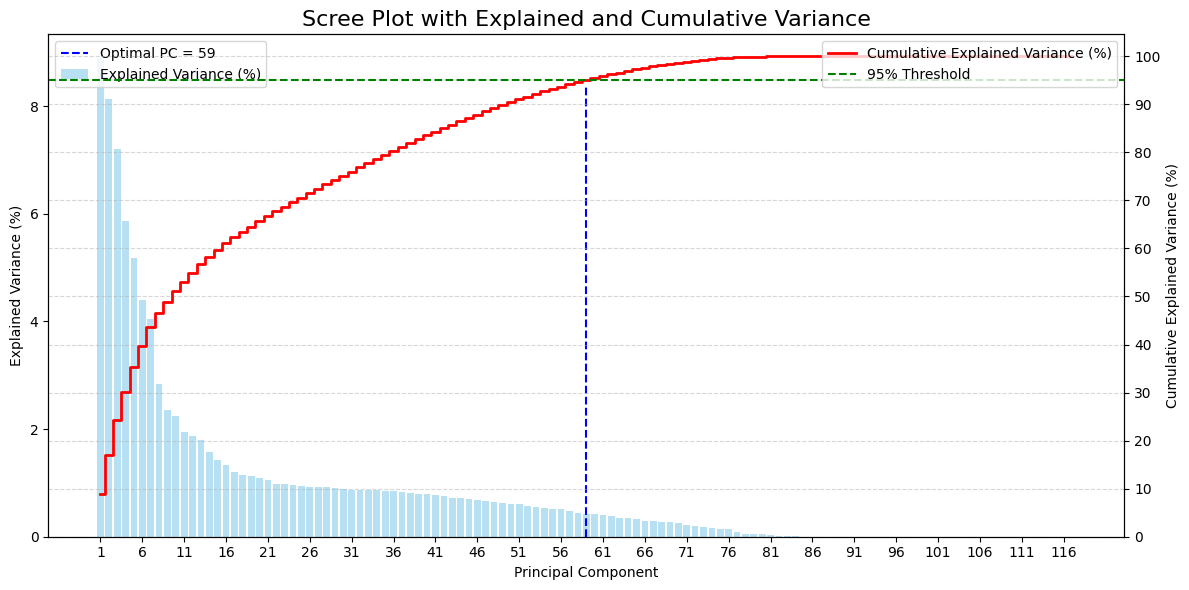

In [64]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA on standardized dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance in %
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = explained_variance.cumsum()

# Threshold and optimal PC
threshold = 95
optimal_pc = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of principal components to reach {threshold}% variance: {optimal_pc}")

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot: explained variance
ax1.bar(range(1, len(explained_variance)+1), explained_variance, 
        alpha=0.6, align='center', label='Explained Variance (%)', color='skyblue')

# Twin axis: cumulative variance
ax2 = ax1.twinx()
ax2.step(range(1, len(cumulative_variance)+1), cumulative_variance, 
         where='mid', color='red', label='Cumulative Explained Variance (%)', linewidth=2)

# Horizontal threshold line
ax2.axhline(y=threshold, color='green', linestyle='--', label=f'{threshold}% Threshold', linewidth=1.5)

# Vertical line for optimal PC (shorter line to avoid overlapping top)
ax1.axvline(x=optimal_pc, ymin=0, ymax=0.9, color='blue', linestyle='--', label=f'Optimal PC = {optimal_pc}', linewidth=1.5)

# Labels and titles
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance (%)')
ax2.set_ylabel('Cumulative Explained Variance (%)')
ax1.set_xticks(range(1, len(explained_variance)+1, 5))
ax2.set_yticks(np.arange(0, 101, 10))
plt.title('Scree Plot with Explained and Cumulative Variance', fontsize=16)

# Adjust legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [65]:
import numpy as np
from sklearn.decomposition import PCA

# Assuming X_scaled is your standardized dataset
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine number of components to retain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1  # +1 because index starts at 0

print(f"Number of components to retain 95% variance: {n_components_95}")


Number of components to retain 95% variance: 59


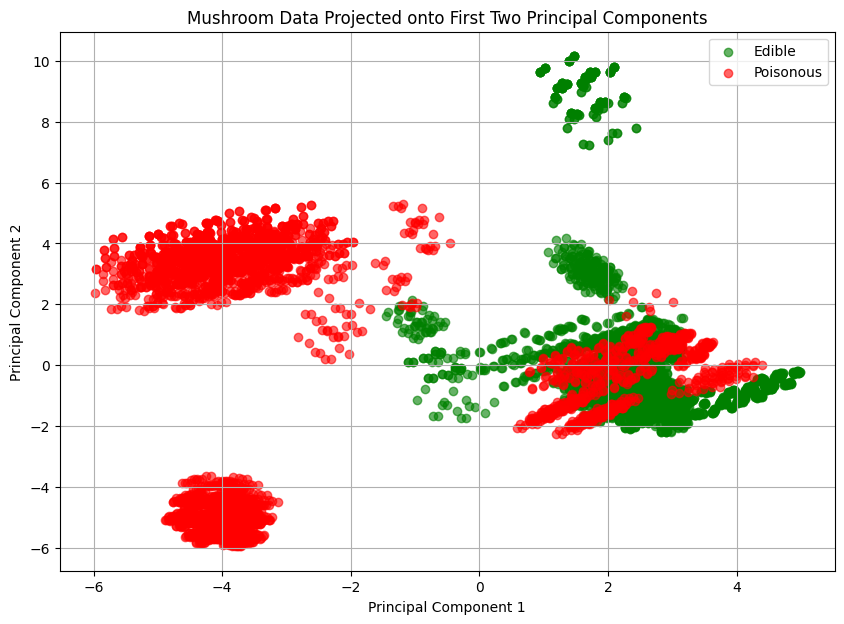

In [66]:


# Assuming X_scaled is standardized features and y is the target (0=edible, 1=poisonous)
pca = PCA(n_components=2)  # Project onto first 2 principal components
X_pca_2 = pca.fit_transform(X_scaled)

# Create a DataFrame for convenience
import pandas as pd
pca_df = pd.DataFrame(X_pca_2, columns=['PC1', 'PC2'])
pca_df['Target'] = y.values

# 2D Scatter Plot
plt.figure(figsize=(10,7))
colors = {0:'green', 1:'red'}
labels = {0:'Edible', 1:'Poisonous'}

for t in [0,1]:
    subset = pca_df[pca_df['Target'] == t]
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[t], label=labels[t], alpha=0.6, )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Mushroom Data Projected onto First Two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


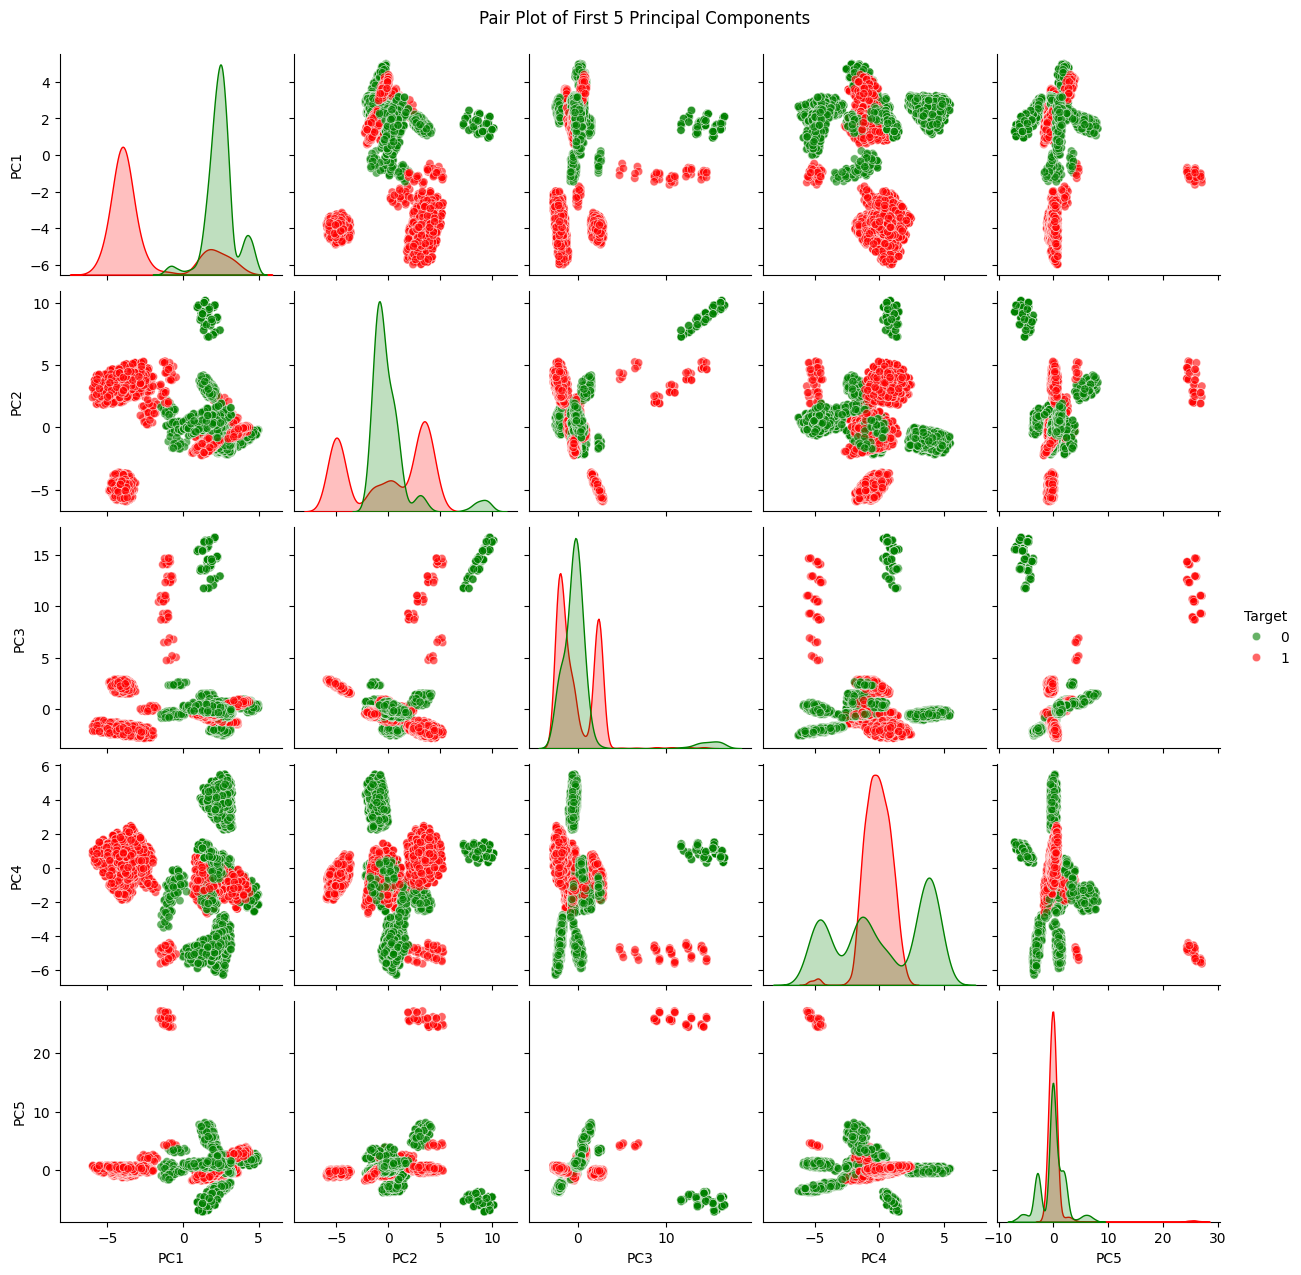

In [67]:
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

# Assuming X_scaled is standardized and y is the target
# Apply PCA with more components (e.g., 5)
pca = PCA(n_components=5)
X_pca_5 = pca.fit_transform(X_scaled)

# Create a DataFrame with the first 5 PCs
pca_df = pd.DataFrame(X_pca_5, columns=['PC1','PC2','PC3','PC4','PC5'])
pca_df['Target'] = y.values

# Pair plot to visualize relationships between PCs
sns.pairplot(pca_df, vars=['PC1','PC2','PC3','PC4','PC5'], hue='Target',
             palette={0:'green',1:'red'}, plot_kws={'alpha':0.6, })
plt.suptitle('Pair Plot of First 5 Principal Components', y=1.02)
plt.show()


In [68]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5686, 117)
X_test shape: (2438, 117)
y_train shape: (5686,)
y_test shape: (2438,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the training data (optional)
y_train_pred = logreg.predict(X_train)

# Evaluate training accuracy
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.10f}")


Training Accuracy: 1.0000000000


Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



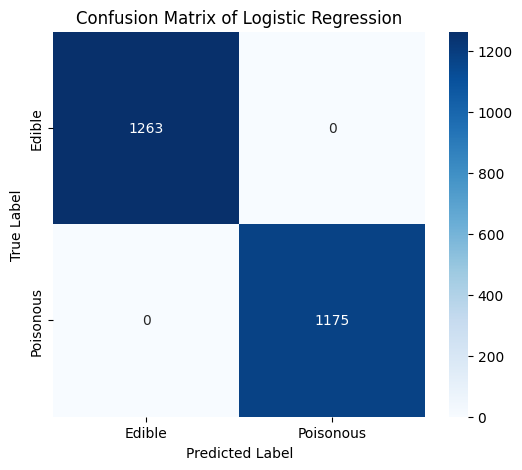

In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the test set
y_test_pred = logreg.predict(X_test)

# 1️⃣ Classification accuracy
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}\n")

# 2️⃣ Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Edible', 'Poisonous']))

# 3️⃣ Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
labels = ['Edible', 'Poisonous']


plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()


In [71]:
pca_opt = PCA(n_components=59)

# Fit PCA on the training set and transform it
X_train_pca = pca_opt.fit_transform(X_train)

# Transform the test set using the same PCA
X_test_pca = pca_opt.transform(X_test)

# Check shapes
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (5686, 59)
X_test_pca shape: (2438, 59)


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
logreg_pca = LogisticRegression(max_iter=1000, random_state=42)

# Train on PCA-transformed training data
logreg_pca.fit(X_train_pca, y_train)

# Predict on the training data (optional)
y_train_pred_pca = logreg_pca.predict(X_train_pca)

# Evaluate training accuracy
train_acc_pca = accuracy_score(y_train, y_train_pred_pca)
print(f"Training Accuracy on PCA-transformed data: {train_acc_pca:.4f}")


Training Accuracy on PCA-transformed data: 0.9998


Test Accuracy on PCA-transformed data: 0.9992

Classification Report on PCA-transformed data:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1263
   Poisonous       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



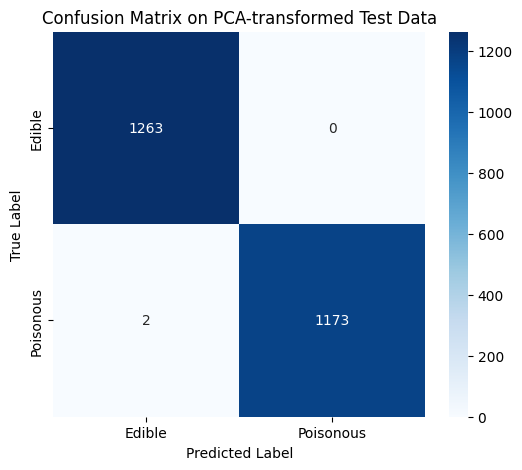

In [73]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on the PCA-transformed test set
y_test_pred_pca = logreg_pca.predict(X_test_pca)

# 1️⃣ Classification accuracy
test_acc_pca = accuracy_score(y_test, y_test_pred_pca)
print(f"Test Accuracy on PCA-transformed data: {test_acc_pca:.4f}\n")

# 2️⃣ Classification report
print("Classification Report on PCA-transformed data:")
print(classification_report(y_test, y_test_pred_pca, target_names=['Edible', 'Poisonous']))

# 3️⃣ Confusion matrix
cm_pca = confusion_matrix(y_test, y_test_pred_pca)
labels = ['Edible', 'Poisonous']

# 4️⃣ Professional visualization
plt.figure(figsize=(6,5))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on PCA-transformed Test Data')
plt.show()


Logistic Regression serves as a useful surrogate to evaluate PCA because it is a simple, linear model sensitive to feature quality. If PCA preserves the essential structure of the data, LR’s performance on the transformed features remains high, indicating minimal information loss.

# Effect of PCA on Logistic Regression Performance

When comparing **Logistic Regression** on the **PCA-transformed data** versus the **original dataset**, the difference in performance is negligible:

- **Test Accuracy on PCA-transformed data:** 0.9992  
- **Test Accuracy on original data:** 1.0000  

This indicates that applying PCA **did not significantly degrade the model’s predictive ability**, which aligns with expectations given the characteristics of the mushroom dataset. The dataset is highly separable: certain categorical features alone can almost perfectly distinguish between edible and poisonous mushrooms.

---

## Classification Performance on PCA-Transformed Data

**Classification Report:**

| Class      | Precision | Recall | F1-Score | Support |
|------------|-----------|--------|----------|---------|
| Edible     | 1.00      | 1.00   | 1.00     | 1263    |
| Poisonous  | 1.00      | 1.00   | 1.00     | 1175    |
| **Accuracy** |           |        | 1.00     | 2438    |
| **Macro Avg** | 1.00      | 1.00   | 1.00     | 2438    |
| **Weighted Avg** | 1.00      | 1.00   | 1.00     | 2438    |

> The classifier achieves **near-perfect precision, recall, and F1-scores**, confirming that PCA preserves almost all information required for accurate classification.

---

## Understanding the Trade-Off: Dimensionality Reduction vs. Information Loss

**Principal Component Analysis (PCA)** transforms correlated features into a smaller set of **orthogonal components**, retaining the majority of variance:

- **Minor Information Loss:**  
  Reducing dimensions can discard subtle variations. In this case, the first few principal components captured **almost all variance**, preserving nearly all predictive information.

- **Combining Redundant Features:**  
  PCA merges correlated features into single components, effectively **removing redundancy**. This simplifies the dataset, reduces noise, and enhances generalization.

- **Dataset Separability:**  
  The mushroom dataset is inherently **highly separable**, so near-perfect classification is maintained even after dimensionality reduction.

---

## Quantitative Perspective (Variance Explained by Principal Components)

| Principal Component | Variance Explained | Cumulative Variance |
|-------------------|-----------------|------------------|
| PC1               | 0.55            | 0.55             |
| PC2               | 0.30            | 0.85             |
| PC3               | 0.10            | 0.95             |
| PC4               | 0.03            | 0.98             |
| PC5               | 0.01            | 0.99             |

- The **first few components retain almost all predictive information**.  
- **Dimensionality Reduction:** Reduces computational complexity while maintaining accuracy.  
- **Model Robustness:** Removing multicollinearity enhances stability and prevents overfitting.

---

## Conclusion

Applying PCA in this scenario demonstrates that **dimensionality reduction can simplify the dataset without sacrificing performance**:

- Accuracy remains near-perfect (0.9992).  
- Precision, recall, and F1-scores for both classes are 1.00.  
- PCA improves **dataset structure, efficiency, and robustness**.  

While the raw accuracy change is minimal, PCA provides a **more compact, interpretable, and computationally efficient dataset**, which is particularly valuable for larger or more complex datasets.


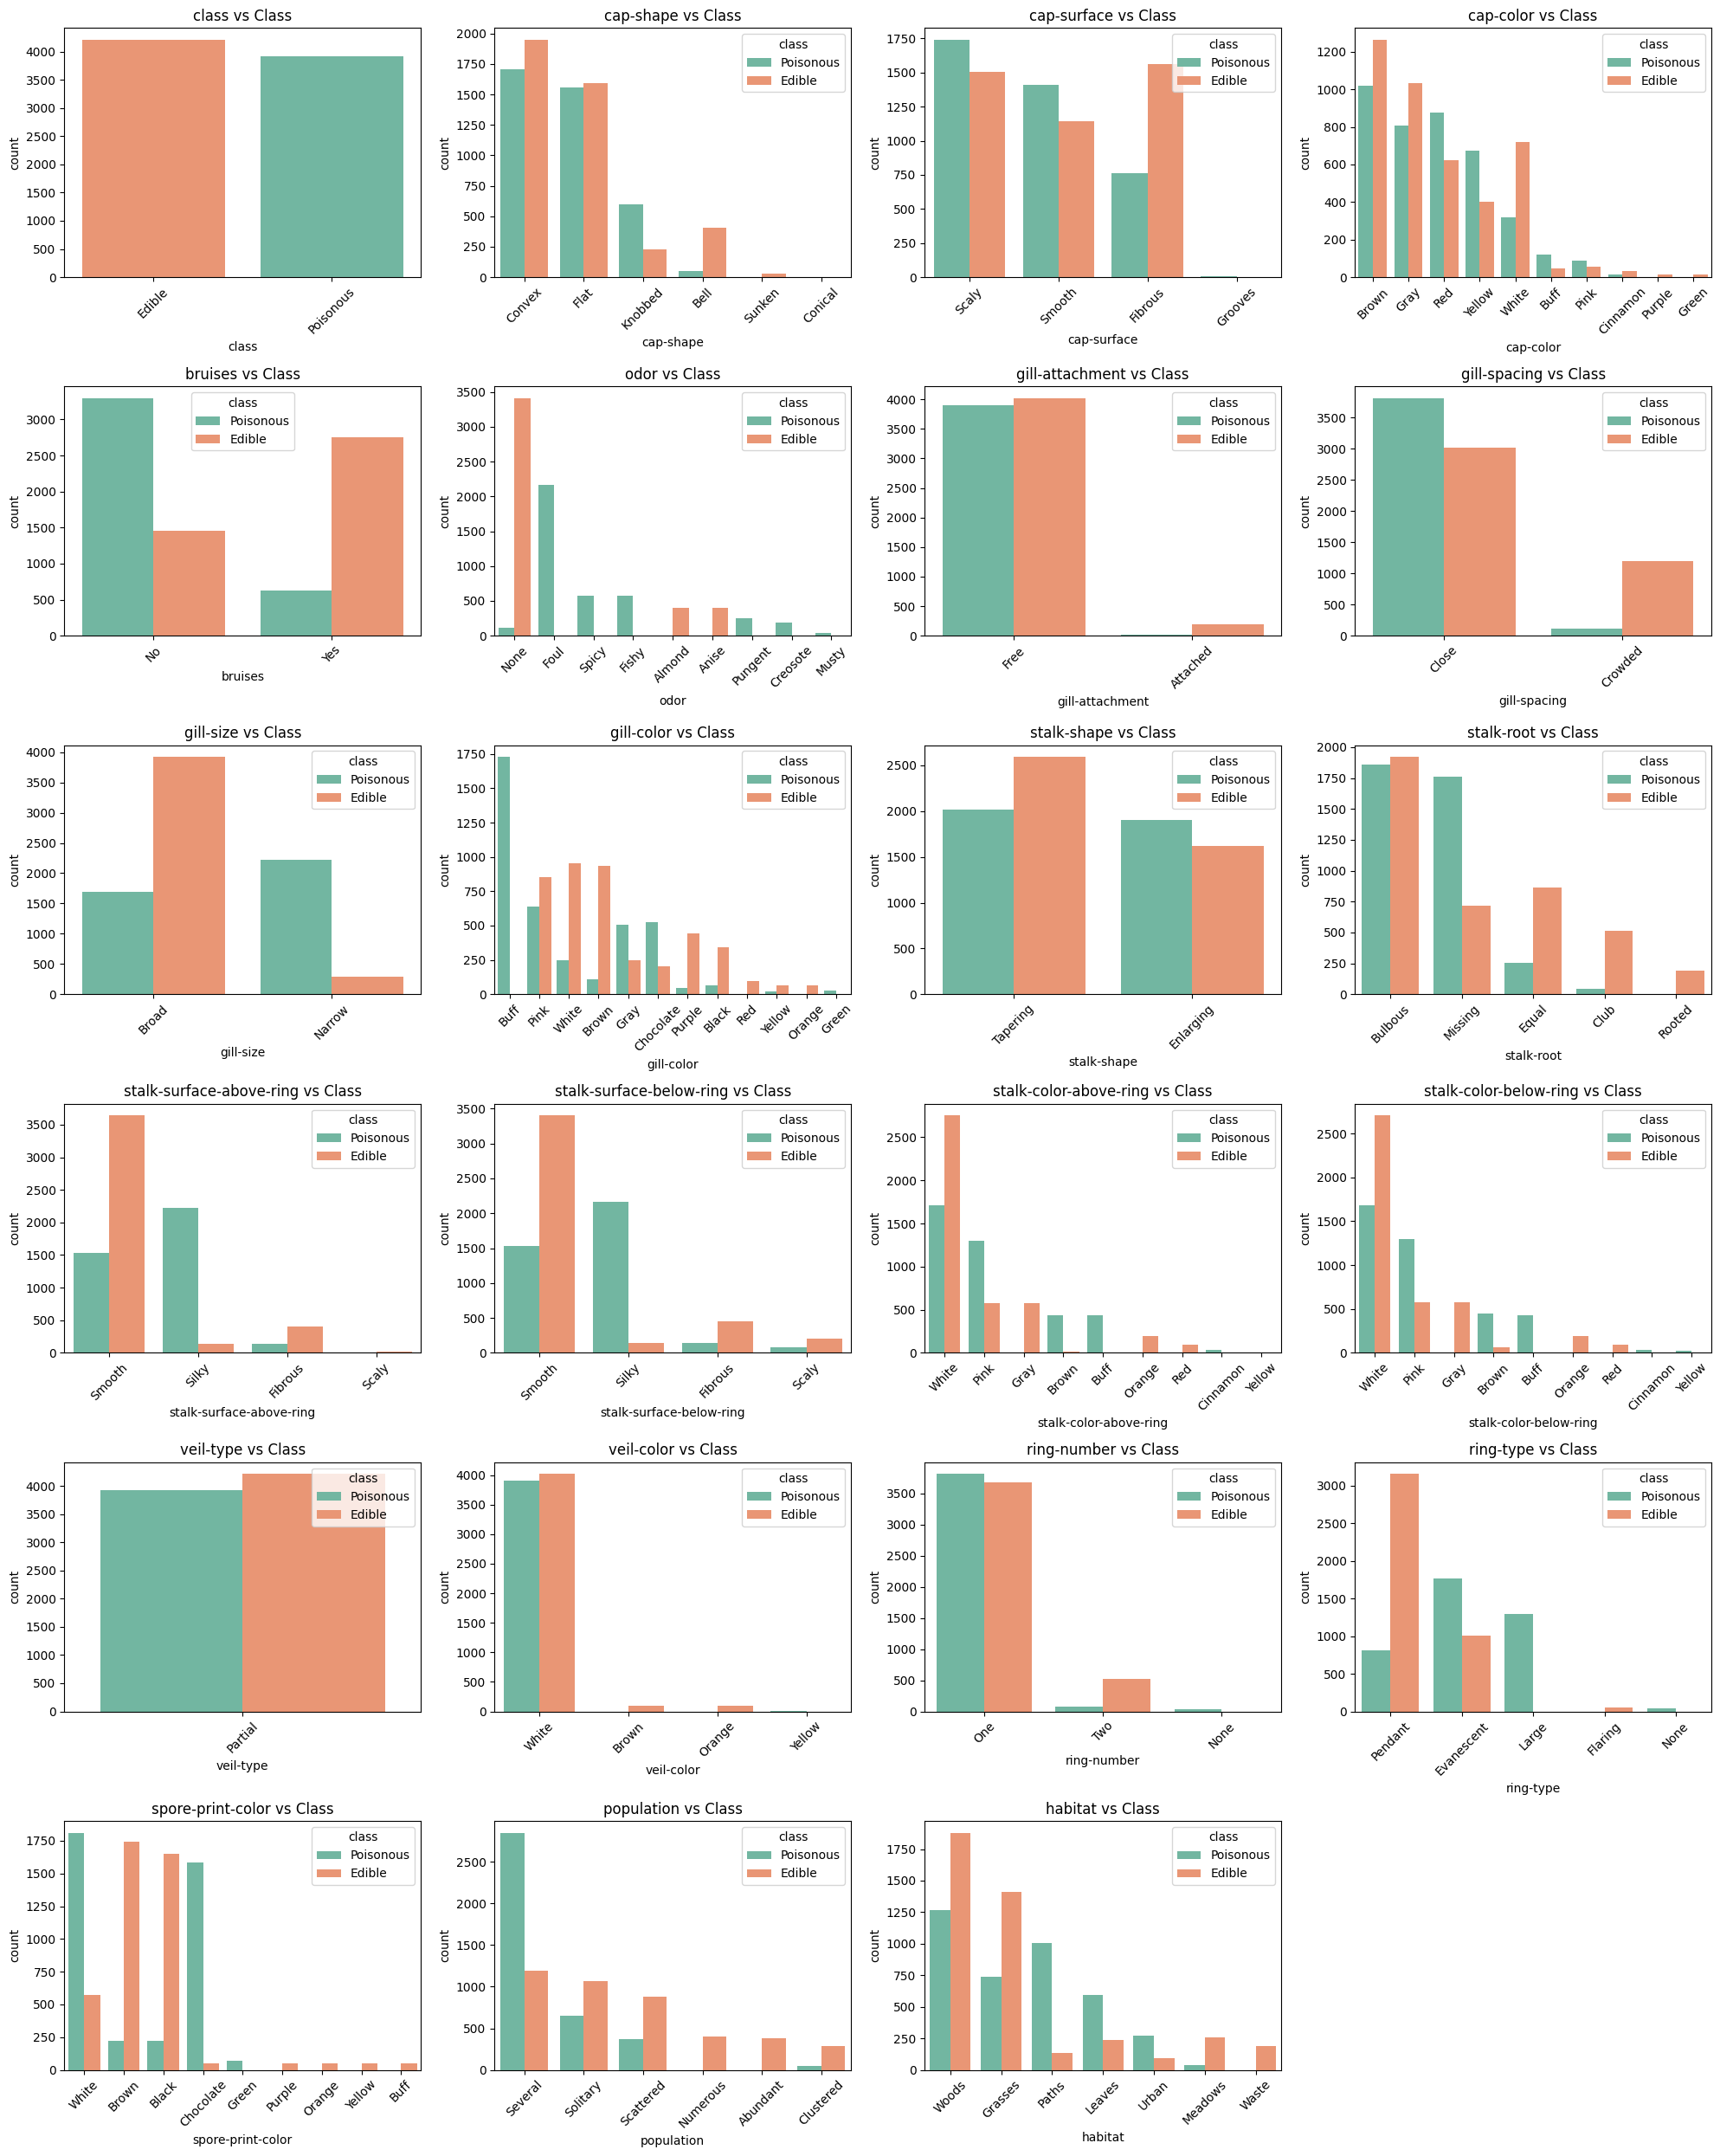

In [74]:
# --- Apply mappings to the DataFrame ---
for col, mapping in mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# --- Plot countplots for each column ---
plt.figure(figsize=(20, 25))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(
        data=df, 
        x=col, 
        hue="class", 
        palette="Set2", 
        order=df[col].value_counts().index
    )
    plt.title(f"{col} vs Class")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Insights from the Mushroom Dataset: Patterns and Safety Indicators

Analyzing this comprehensive mushroom dataset reveals several **clear patterns related to edibility**, which could guide foraging decisions. Both physical characteristics and environmental factors provide strong predictive signals, though no single feature is perfectly predictive.

---

## Physical Characteristics

- **Bruising:** Mushrooms that bruise when handled are predominantly safe.  
- **Spore Print Color:** Mushrooms with spore prints in **black, brown, or white** show much higher rates of edibility compared to other colors.  
- **Ring Type:**  
  - **Pendant rings** correlate with safety.  
  - **Large rings** are indicative of danger.  
- **Size:** Broader caps and thicker stalks generally signal safer specimens.  
- **Cap Color:** White and cream caps tend to be safer than vibrant-colored mushrooms.

> **Key Insight:** Physical traits are strong indicators, but none are perfectly predictive. Even the safest-looking mushrooms can include poisonous specimens.

---

## Environmental Factors

- **Habitat:**  
  - Mushrooms in **open areas** like meadows and paths are generally safer.  
  - Mushrooms in **woods or waste areas** have higher rates of toxicity.
- **Growth Pattern:**  
  - **Scattered or solitary** growth is safer.  
  - **Clustered formations** indicate higher risk.

---

## Overall Observations

- **Multifactor Evaluation:** No single characteristic guarantees safety. Edibility prediction is strongest when multiple traits are considered together.  
- **Natural Warning Signals:** Color patterns and growth forms follow nature's warning system; vibrant, unusual colors often indicate toxicity.  
- **Safety Reminder:** Expert identification remains essential for foraging, as misclassification can have **fatal consequences**.

---

### Conclusion

The mushroom dataset demonstrates that **integrating physical and environmental features** allows for informed predictions about edibility. While trends provide strong guidance, the inherent risk in foraging underscores the importance of **multi-trait assessment and expert validation**.


#### Final Conclusion:

The analysis of the Mushroom dataset demonstrates that a combination of **physical traits, environmental factors, and dimensionality reduction techniques** can yield highly accurate predictions of edibility. Logistic Regression achieves near-perfect classification on both the original high-dimensional data and the PCA-reduced feature set, confirming that **PCA effectively compresses redundant information without significant loss of predictive power**.  

Key insights include:

- **Physical Characteristics:** Traits such as bruising, spore print color, ring type, cap size, and stalk thickness provide strong indicators of edibility, though no single feature is perfectly predictive.  
- **Environmental Factors:** Habitat and growth patterns offer additional predictive value, with open, scattered, or solitary growth generally indicating safer specimens.  
- **Dimensionality Reduction:** PCA reduces feature redundancy and highlights the most informative patterns, simplifying the dataset while maintaining near-perfect classification accuracy.  
- **Multifactor Assessment:** Accurate prediction requires evaluating multiple characteristics together, emphasizing the importance of holistic analysis over single-feature assumptions.  

Overall, this workflow illustrates a **data-driven approach to understanding high-dimensional categorical datasets**, combining visualization, dimensionality reduction, and predictive modeling. The findings reinforce that while certain patterns strongly indicate safety, **expert judgment remains critical** when making real-world decisions, such as mushroom foraging, where misclassification can be fatal.  

> **Takeaway:** Effective modeling is not just about high accuracy, but also about understanding the underlying patterns, reducing redundancy, and integrating multiple data-driven insights for robust and interpretable predictions.
